# Visualisation of FGW optimal map 

In [1]:
import os,sys
sys.path.append(os.path.realpath('../lib'))
import pylab as pl
import numpy as np
import ot
import FGW

We create two 1D random measures 

In [2]:
n=20
n2=30
sig=1
sig2=0.1

np.random.seed(0)

phi=np.arange(n)[:,None]
xs=phi+sig*np.random.randn(n,1)
ys=np.vstack((np.ones((n//2,1)),0*np.ones((n//2,1))))+sig2*np.random.randn(n,1)

phi2=np.arange(n2)[:,None]
xt=phi2+sig*np.random.randn(n2,1)
yt=np.vstack((np.ones((n2//2,1)),0*np.ones((n2//2,1))))+sig2*np.random.randn(n2,1)
yt= yt[::-1,:]

p=ot.unif(n)
q=ot.unif(n2)

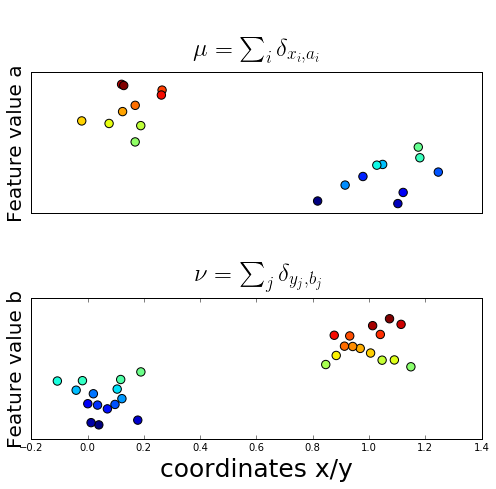

In [3]:
pl.close(10)
pl.figure(10,(7,7))

pl.subplot(2,1,1)

pl.scatter(ys,xs,c=phi,s=70)
#pl.xlabel('x')
pl.ylabel('Feature value a',fontsize=20)
pl.title('$\mu=\sum_i \delta_{x_i,a_i}$',fontsize=25, usetex=True, y=1.2)
pl.xticks(())
pl.yticks(())
pl.subplot(2,1,2)
pl.scatter(yt,xt,c=phi2,s=70)
pl.xlabel('coordinates x/y',fontsize=25)
pl.ylabel('Feature value b',fontsize=20)
#pl.title('$\nu=\sum_i \delta_{y_i,w_i}$')
pl.title('$\\nu=\sum_j \delta_{y_j,b_j}$',fontsize=25, usetex=True, y=1.2)
#pl.xticks(())
pl.yticks(())
pl.tight_layout()
pl.show()

We compute their intra structures distances C1, C2 as their pair-to-pair euclidean distances in the source (resp target) domains, and M the across domains distance.   

In [4]:
C1=ot.dist(xs)
C2=ot.dist(xt).T
M=ot.dist(ys,yt)
w1=ot.unif(C1.shape[0])
w2=ot.unif(C2.shape[0])
Got=ot.emd([],[],M)


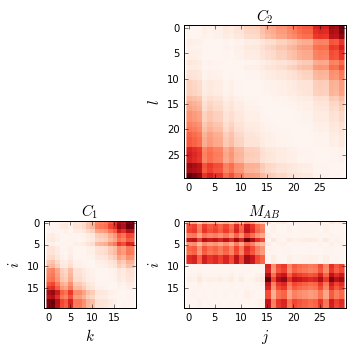

In [5]:
cmap='Reds'
pl.close(10)
pl.figure(10,(5,5))
fs=15
l_x=[0,5,10,15]
l_y=[0,5,10,15,20,25]
gs = pl.GridSpec(5, 5)

ax1=pl.subplot(gs[3:,:2])

pl.imshow(C1,cmap=cmap,interpolation='nearest')
pl.title("$C_1$",fontsize=fs)
pl.xlabel("$k$",fontsize=fs)
pl.ylabel("$i$",fontsize=fs)
pl.xticks(l_x)
pl.yticks(l_x)

ax2=pl.subplot(gs[:3,2:])

pl.imshow(C2,cmap=cmap,interpolation='nearest')
pl.title("$C_2$",fontsize=fs)
pl.ylabel("$l$",fontsize=fs)
#pl.ylabel("$l$",fontsize=fs)
pl.xticks(())
pl.yticks(l_y)
ax2.set_aspect('auto')

ax3=pl.subplot(gs[3:,2:],sharex=ax2,sharey=ax1)
pl.imshow(M,cmap=cmap,interpolation='nearest')
pl.yticks(l_x)
pl.xticks(l_y)
pl.ylabel("$i$",fontsize=fs)
pl.title("$M_{AB}$",fontsize=fs)
pl.xlabel("$j$",fontsize=fs)
pl.tight_layout()
ax3.set_aspect('auto')
pl.show()

We calculate the GW and FGW distances

In [6]:
#%reload_ext WGW 
Gg,log=FGW.gw_lp(C1,C2,p,q,loss_fun='square_loss',verbose=True,log=True)
    

#%%
alpha=1e-3
    
ot.tic()
Gwg,logw=FGW.fgw_lp(M,C1,C2,p,q,loss_fun='square_loss',alpha=alpha,verbose=True,log=True)
ot.toc()


It.  |Loss        |Delta loss
--------------------------------
    0|4.683978e+04|0.000000e+00
    1|3.869487e+04|-8.144916e+03|9.900000e-01
    2|2.209704e+04|-1.659783e+04|9.900000e-01
    3|2.183217e+04|-2.648743e+02|9.900000e-01
    4|2.182951e+04|-2.658632e+00|9.900000e-01
    5|2.182948e+04|-2.658731e-02|9.900000e-01
    6|2.182948e+04|-2.658732e-04|9.900000e-01
    7|2.182948e+04|-2.658733e-06|9.900000e-01
    8|2.182948e+04|-2.658271e-08|9.900000e-01
    9|2.182948e+04|-2.692104e-10|9.900000e-01
It.  |Loss        |Delta loss
--------------------------------
    0|4.734462e+01|0.000000e+00
    1|2.545200e+01|-2.189263e+01|9.900000e-01
    2|2.193073e+01|-3.521269e+00|9.900000e-01
    3|2.189366e+01|-3.706811e-02|9.900000e-01
    4|2.189329e+01|-3.708667e-04|9.900000e-01
    5|2.189329e+01|-3.708685e-06|9.900000e-01
    6|2.189329e+01|-3.708685e-08|9.900000e-01
    7|2.189329e+01|-3.708642e-10|9.900000e-01
Elapsed time : 0.0057408809661865234 s


0.0057408809661865234

We plot the optimal maps

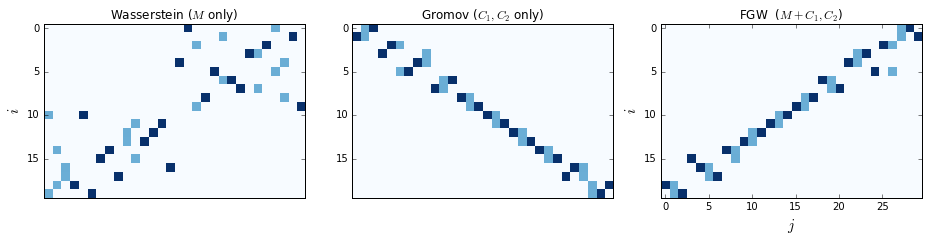

In [7]:
#%% visu OT matrix
cmap='Blues'
fs=15
pl.figure(2,(13,5))
pl.clf()
pl.subplot(1,3,1)    
pl.imshow(Got,cmap=cmap,interpolation='nearest')
#pl.xlabel("$y$",fontsize=fs)
pl.ylabel("$i$",fontsize=fs)
pl.xticks(())

pl.title('Wasserstein ($M$ only)')

pl.subplot(1,3,2)    
pl.imshow(Gg,cmap=cmap,interpolation='nearest')
pl.title('Gromov ($C_1,C_2$ only)')
pl.xticks(())
pl.subplot(1,3,3)    
pl.imshow(Gwg,cmap=cmap,interpolation='nearest')
pl.title('FGW  ($M+C_1,C_2$)')

pl.xlabel("$j$",fontsize=fs)
pl.ylabel("$i$",fontsize=fs)

pl.tight_layout()
pl.show()

Fused Gromov-Wasserstein incorporates both feature and structure maps in a single transport map.